# **Introduction**

In health care systems worldwide, no-shows (or non-attendance of medical appointments) are a severe issue causing lost resources, institutional cost, and reduced access to health care for other patients. The no-show rate also varies geographically, but there are estimates showing that 15% to 30% of the appointments go unnoticed and unannounced, which delays hospital operations and results in more waiting time for patients.

This project intends to predict no-shows using machine learning from past appointment histories to identify patterns that indicate the probability of a patient missing his or her appointment. Through effective prediction of no-shows, clinicians are able to take preventive measures such as sending reminders to particular patients, strategically overbooking, or holding the time slot for other patients and thereby improve organizational effectiveness and quality of care for patients.

# **Motivation**

The motivation for this project stems from the severe impact of no-shows on health care effectiveness and patient outcomes. The impacts of lost appointments extend to:
    
    Wasted Resources & Financial Losses:
Hospitals and clinics operate on tight timetables, and when patients do not show up, valuable time slots are lost. This means that medical staff and equipment are left idle, causing financial losses and low productivity.

Increased Wait Times for Other Patients
Emergency patients who need prompt medical attention are forced to wait longer due to inefficiencies resulting from no-shows. Greater predictability and control over scheduling appointments can reduce wait times and improve patient satisfaction.

    Preventable Health Deterioration
Many patients, especially chronic disease patients, require follow-up appointments. Missing an appointment can result in delayed treatments, deteriorating conditions, and higher risks of complications. The ability to determine high-risk no-show patients enables clinics to take proactive measures in ensuring they receive treatment.

    Data-Driven Decision Making in Healthcare
With Artificial Intelligence (AI) growing in healthcare, the use of predictive analytics can revolutionize the way hospitals manage patient appointments. Using historical data and machine learning algorithms, we can identify root behavioral patterns that cause no-shows and create an early warning system for physicians.

By developing an accurate and comprehensible machine learning model, this project will help to optimize hospital efficiency, improve patient health outcomes, and reduce healthcare system financial losses.

# Loading and basic cleaning

In [12]:
import gdown
import pandas as pd

url = 'https://drive.google.com/uc?id=1Fi8wOuu1shUW09qvxeir6K8sX9Ut8XGv'
output = 'noshow_dataset.csv'
gdown.download(url, output, quiet=False)

df = pd.read_csv(output)
print("First 5 rows of the dataset:")
print(df.head())

# -----------------
# Basic Data Cleaning
# -----------------

# 1. Remove duplicate rows
df = df.drop_duplicates()

# 2. Check for missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())

# 3. Standardize column names: remove extra spaces and convert to lower case
df.columns = df.columns.str.strip().str.lower()

# 4. Convert date columns to datetime objects
# (Assuming 'scheduledday' and 'appointmentday' are present; adjust as needed)
if 'scheduledday' in df.columns:
    df['scheduledday'] = pd.to_datetime(df['scheduledday'])
if 'appointmentday' in df.columns:
    df['appointmentday'] = pd.to_datetime(df['appointmentday'])

# 5. (Optional) Rename or drop any irrelevant columns if necessary
# Example:
# df = df.rename(columns={'old_name': 'new_name'})
# df = df.drop(['irrelevant_column'], axis=1)

# Display DataFrame information after cleaning
print("\nDataFrame Info after cleaning:")
print(df.info())


Downloading...
From: https://drive.google.com/uc?id=1Fi8wOuu1shUW09qvxeir6K8sX9Ut8XGv
To: /content/noshow_dataset.csv
100%|██████████| 10.7M/10.7M [00:00<00:00, 53.4MB/s]


First 5 rows of the dataset:
      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1        

In [13]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  float64            
 1   appointmentid   110527 non-null  int64              
 2   gender          110527 non-null  object             
 3   scheduledday    110527 non-null  datetime64[ns, UTC]
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int64              
 6   neighbourhood   110527 non-null  object             
 7   scholarship     110527 non-null  int64              
 8   hipertension    110527 non-null  int64              
 9   diabetes        110527 non-null  int64              
 10  alcoholism      110527 non-null  int64              
 11  handcap         110527 non-null  int64              
 12  sms_received    110527 non-null  int64              
 13  

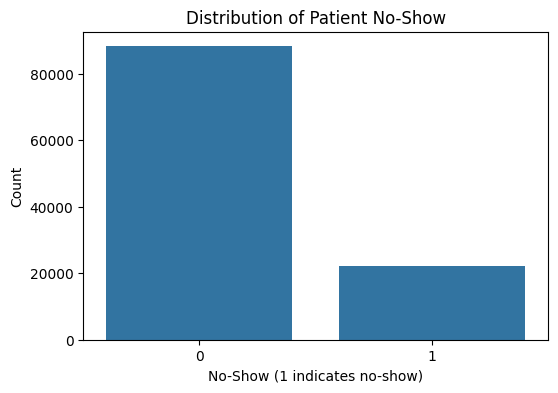

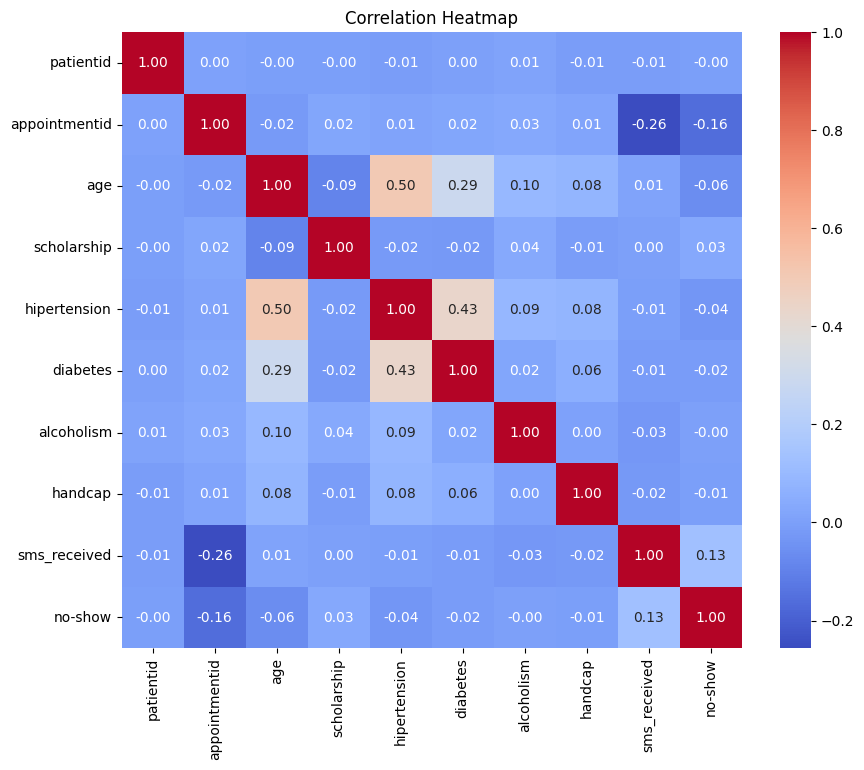

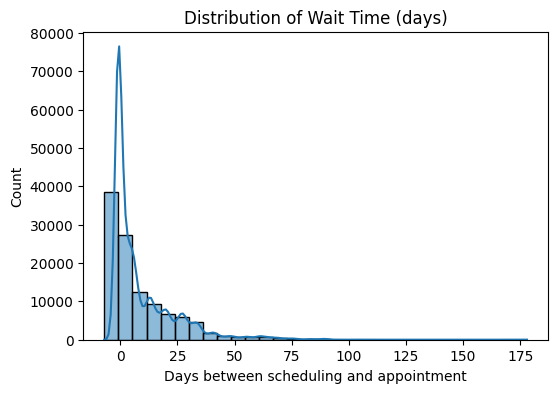

Training Logistic Regression...
Training Random Forest...
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:12:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model Evaluation on Test Set:

Logistic Regression:
Accuracy: 0.7963
ROC AUC: 0.6572
F1 Score: 0.0351
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     17669
           1       0.35      0.02      0.04      4437

    accuracy                           0.80     22106
   macro avg       0.58      0.51      0.46     22106
weighted avg       0.71      0.80      0.72     22106


Random Forest:
Accuracy: 0.7933
ROC AUC: 0.7348
F1 Score: 0.2665
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88     17669
           1       0.46      0.19      0.27      4437

    accuracy                           0.79     22106
   macro avg       0.64      0.57      0.57     22106
weighted avg       0.75      0.79      0.76     22106


XGBoost:
Accuracy: 0.8015
ROC AUC: 0.7419
F1 Score: 0.1252
Classification Report:
              precision    recall  f1-score   su

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Exploratory Data Analysis (EDA)

print("Dataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())


target_column = 'no-show'
if target_column in df.columns:
    df[target_column] = df[target_column].map({'No': 0, 'Yes': 1})
    print("\nTarget variable distribution:")
    print(df[target_column].value_counts())

# Plot distribution of target variable
plt.figure(figsize=(6,4))
sns.countplot(x=target_column, data=df)
plt.title("Distribution of Patient No-Show")
plt.xlabel("No-Show (1 indicates no-show)")
plt.ylabel("Count")
plt.show()

# Correlation heatmap for numeric features
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# If you have date columns (e.g., scheduledday and appointmentday), compute wait time
if 'scheduledday' in df.columns and 'appointmentday' in df.columns:
    df['scheduledday'] = pd.to_datetime(df['scheduledday'])
    df['appointmentday'] = pd.to_datetime(df['appointmentday'])
    df['wait_time'] = (df['appointmentday'] - df['scheduledday']).dt.days
    plt.figure(figsize=(6,4))
    sns.histplot(df['wait_time'], bins=30, kde=True)
    plt.title("Distribution of Wait Time (days)")
    plt.xlabel("Days between scheduling and appointment")
    plt.show()


# Drop duplicate rows if not already done
df = df.drop_duplicates()

# Define features and target
target = target_column
features = df.drop(columns=[target])

# Optionally drop columns that are irrelevant (e.g., ID columns)
for col in ['id', 'patientid']:
    if col in features.columns:
        features = features.drop(columns=[col])

# Identify categorical and numerical columns
categorical_cols = features.select_dtypes(include=['object']).columns.tolist()
numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create preprocessing pipelines for numeric and categorical data
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = features
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------
# Building ML Models
# --------------------------

# We'll compare Logistic Regression (as a baseline), Random Forest, and XGBoost
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report

# Create pipelines for each model
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(max_iter=1000))])

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))])

# Train the models
print("Training Logistic Regression...")
pipeline_lr.fit(X_train, y_train)
print("Training Random Forest...")
pipeline_rf.fit(X_train, y_train)
print("Training XGBoost...")
pipeline_xgb.fit(X_train, y_train)

# Evaluate the models on the test set
models = {'Logistic Regression': pipeline_lr,
          'Random Forest': pipeline_rf,
          'XGBoost': pipeline_xgb}

print("\nModel Evaluation on Test Set:")
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    f1 = f1_score(y_test, y_pred)
    print(f"\n{name}:")
    print("Accuracy: {:.4f}".format(accuracy))
    print("ROC AUC: {:.4f}".format(roc_auc))
    print("F1 Score: {:.4f}".format(f1))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



In [16]:
# --------------------------
# Snippet to Test the Model on New Data by yourself
# --------------------------
# Define a sample new data point. Replace the keys and values with ones that match your dataset's features.
new_data = {
    # Example:
    #'age': 45,
    #'gender': 'F',
    #'scheduledday': '2023-03-10T00:00:00Z',
    #'appointmentday': '2023-03-15T00:00:00Z',
    #'neighbourhood': 'SomeNeighborhood',
    #'wait_time': 5,
    # ... include all required features here
}

# Convert the dictionary into a DataFrame
new_df = pd.DataFrame([new_data])

# For date columns, ensure conversion to datetime if needed
if 'scheduledday' in new_df.columns:
    new_df['scheduledday'] = pd.to_datetime(new_df['scheduledday'])
if 'appointmentday' in new_df.columns:
    new_df['appointmentday'] = pd.to_datetime(new_df['appointmentday'])

# Choose the best performing model (for example, assume XGBoost performed best)
best_model = pipeline_xgb
prediction = best_model.predict(new_df)
prediction_proba = best_model.predict_proba(new_df)[:, 1]

print("\nNew Data Prediction:")
print("Predicted class (0 = show, 1 = no-show):", prediction[0])
print("Prediction probability of no-show:", prediction_proba[0])


TypeError: 'NoneType' object is not iterable